# Bulk Archetype Tasks

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

## Read in bulk RNA seq data and ParTI files
Read in CCLE and Minna data, as well as archetype data such as distance from archetype of each sample, and archetype locations.

In [6]:
import os.path as op
indir='/Users/smgroves/Documents/GitHub/Groves-CellSys2021/data/bulk-rna-seq/'


In [4]:
outdir = '/Users/smgroves/Documents/GitHub/Groves-CellSys2021/notebooks/out/'

Read in bulk RNA seq cell line data as `data`

In [8]:
data = pd.read_csv(op.join(indir,'SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv'), header = 0, index_col=0)
data = data.T
data.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADACL2,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
m.DMS153,2.955199,0.077212,2.267502,0.011011,2.453512,4.693518,5.604911,0.023528,-0.010271,2.941738,...,3.939669,6.852976,1.664986,2.541377,3.696684,2.157076,3.203573,0.487181,2.299240,4.944759
m.NCIH60,3.239727,0.167166,0.122302,-0.007241,1.528297,5.889316,4.345321,0.050939,-0.022236,3.558743,...,4.864912,5.796933,2.122629,4.070915,3.737488,2.397393,3.531696,5.936393,3.690349,3.893902
m.NCIH69,3.599770,0.117398,0.085891,-0.005086,1.428711,6.002266,4.460012,0.035774,-0.015616,3.888875,...,4.786084,6.610108,0.114373,0.134965,3.466131,1.863985,3.208492,3.744837,4.100225,4.095373
m.NCIH82,3.055231,0.536179,1.586479,-0.004471,0.359365,5.981354,4.859381,0.031453,-0.013730,3.640416,...,4.725295,5.369400,1.575644,3.127523,3.856145,2.255620,3.311325,4.646812,4.140049,5.760181
m.NCIH128,4.579507,0.088160,0.064500,-0.003819,0.865621,5.222291,5.884253,0.026864,-0.011727,3.003065,...,4.081717,6.199033,1.596850,2.570837,3.553932,2.100612,3.854498,1.620770,3.587906,4.814864


We want to read in the cell line labels generated by my clustering (in Figure S1).

In [16]:
clines = pd.read_csv(op.join(indir,"combined_clusters_2020-05-27-MC copy.csv"), index_col = 0)
clines

,source,subtype,NEW_10_2020,10_08_2020
c.COLO668,CCLE,A2,A2,A2
c.CORL24,CCLE,A,N,A
c.CORL279,CCLE,A,A,A
c.CORL311,CCLE,P,P,P
c.CORL47,CCLE,A,A,A
...,...,...,...,...
m.NCIH82,Minna,N,N,uncl
m.NCIH841,Minna,Y,Y,Y
m.NCIH865,Minna,A2,A2,A2
m.NCIH889,Minna,A,A,A


The MATLAB `ParTI` package calculates distances of each sample to each archetype with the function `[ordering, distances] = sortDataByDistance(DataPoints,Archetypes)`, which is called in in `calculateEnrichment`, which is called in `ParTI` as `calculateEnrichment(pc(:,1:size(arc,2)),arc,...)`. Thus, these distances and the ordering is based on distances in the reduced archetype space, i.e. the first five principal components for a 5-archetype space. We need to reformat these to make them understandable in python.

In [17]:
distances = pd.read_csv(op.join(indir,"distances.csv"), header = None).T
distances.columns = ['SCLC-Y', 'SCLC-P','SCLC-N','SCLC-A2','SCLC-A']
distances.head()

,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2,SCLC-A
0,122.034899,107.833082,91.214260,93.282333,76.338367
1,122.334497,108.867795,95.302842,101.101440,77.636464
2,129.333514,112.065962,96.835822,101.923496,81.288051
3,129.561391,120.786395,98.340963,103.160870,83.854943
4,133.735308,122.521452,98.476548,103.607238,85.915890


In [18]:
ordering = pd.read_csv(op.join(indir,"ordering.csv"), header = None).T


In [19]:
#change from MATLAB to python indexing
ordering = ordering-1

In [20]:
for c in ordering:
    ordering[f"order_{c}"] = clines.index[list(ordering[c])]

In [21]:
ordering.columns = [0,1,2,3,4, 'SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']

In [22]:
for c in distances:
    x = distances[c]
    x.index = ordering[c].values
    distances[c] = x.sort_index().values
distances.index = clines.index


In [23]:
distances.head()

,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2,SCLC-A
c.COLO668,219.711613,163.151579,190.111824,108.962738,168.018820
c.CORL24,222.904409,194.007225,147.307784,179.723460,145.958027
c.CORL279,222.164942,182.309984,134.033402,139.243882,142.255942
c.CORL311,221.129705,129.052134,156.731679,170.742741,162.306829
c.CORL47,230.207672,176.544479,139.077497,132.215445,122.241732


Lastly, we'll read in the principal component dimensions of the data, so we can plot the first two components and visualize the samples, and the archetype data, so we can add the archetypes to these plots.

In [25]:
pcs = pd.read_csv(op.join(indir,"pc.csv"), header = None)
pcs.index = clines.index

## Plot PC with Subtype Labels

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

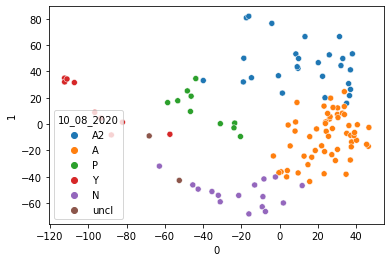

In [26]:
sns.scatterplot(pcs[0],pcs[1], hue = clines['10_08_2020'])

In [28]:
arc = pd.read_csv(op.join(indir, 'arc_gene_space_no_lowgenes.csv'), header = None)
arc.columns = data.columns
arc = arc.T
pc_loadings = pd.read_csv(op.join(indir, 'pc_loadings.csv'), header = None)
pc_loadings.index = data.columns
arc_pc = pc_loadings.T.dot(arc.sub(data.mean().values, axis = 0))
arc_pc.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']
arc_pc = arc_pc[sorted(list(arc_pc.columns))]

The labels below we generated manually by looking at the top genes in each PC loading in ConsensusPathDB. They are approximate terms and are not included in the manuscript, but are for my own reference.

## Plot PC loadings

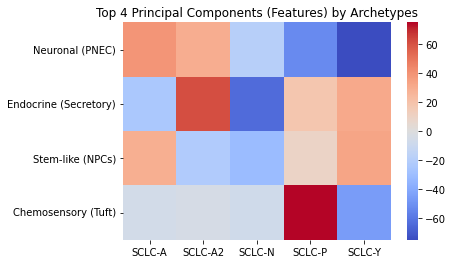

In [29]:
arc_hm = arc_pc.iloc[0:4]
arc_hm.index = ['Neuronal (PNEC)','Endocrine (Secretory)','Stem-like (NPCs)', 'Chemosensory (Tuft)']
sns.heatmap(arc_hm, cmap='coolwarm', vmin = -75, vmax = 75,)
plt.title('Top 4 Principal Components (Features) by Archetypes')
plt.show()

# Slithering and Axonogenesis analysis

In [30]:
axons = pd.read_csv(op.join(indir,'axon_genes.csv'), index_col=None, header = None)

In [31]:
axon_genes = [i.upper() for i in axons[0].values]

In [32]:
axon_expression = data[set(axon_genes).intersection(data.columns)]

In [34]:
axon_expression.shape

(120, 68)

**68 genes out of 69 from Yang et al.**

In [35]:
axon_expression = axon_expression.sort_index()

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


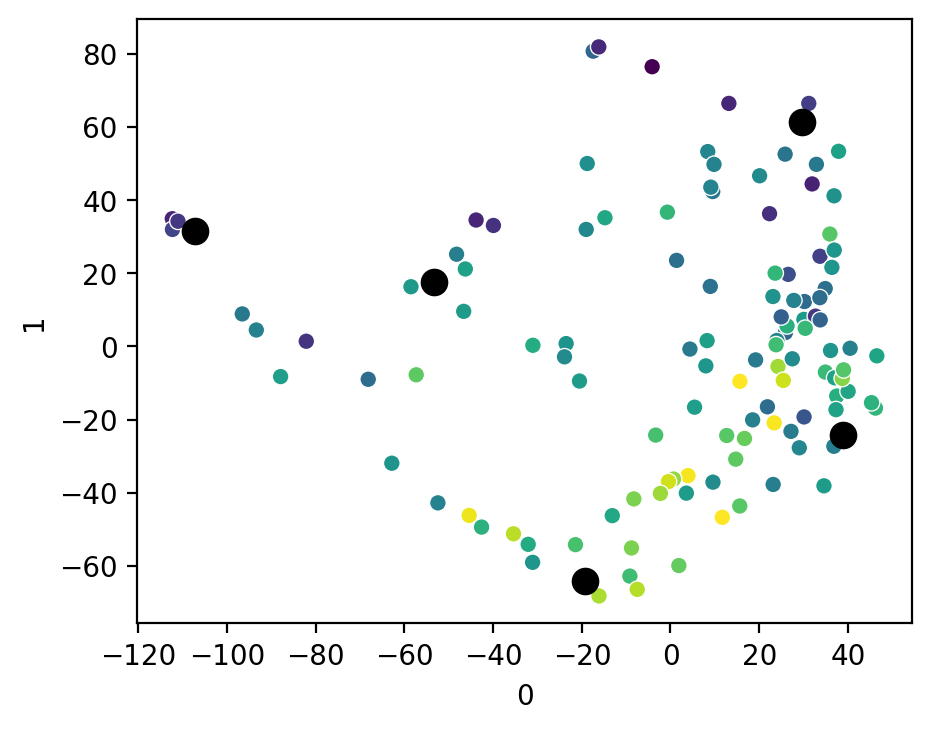

In [36]:
pcs_to_plot = [0,1]
plt.figure(figsize = (5,4), dpi = 200)
sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], c = axon_expression.mean(axis = 1))
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
# for (x,y, label) in zip(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]],clines.index):
#     try:
#         if label.split('.')[1] in adata.obs['cline'].cat.categories:
#             plt.text(x,y,label)
#         elif label.split('.NCI')[1] in adata.obs['cline'].cat.categories:
#             plt.text(x,y,label)
#     except IndexError: pass
# plt.title('Axonogenesis Genes from Yang et al.')
# plt.savefig('./out/axongenesis_fig.pdf')

We want to know if average expression of axonogenesis genes is higher near the N archetype.

R^2: 0.4303727985647381
R: [[ 1.         -0.65602805]
 [-0.65602805  1.        ]]


Text(0.5, 0, 'Distance from SCLC-N Archetype')

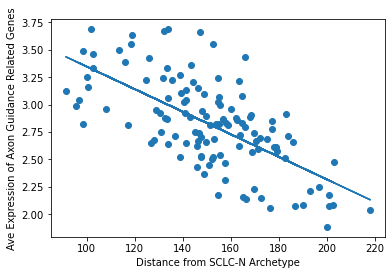

In [42]:
x = distances['SCLC-N']
y = axon_expression.mean(axis = 1)
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
from sklearn.metrics import r2_score
print("R^2: " + str(r2_score(y, m*x + b)))
print("R: " + str(np.corrcoef(x,y)))
plt.scatter(distances['SCLC-N'],axon_expression.mean(axis = 1))
plt.ylabel("Ave Expression of Axon Guidance Related Genes")
plt.xlabel("Distance from SCLC-N Archetype")
# plt.savefig('./out/axonogenesis_scatterplot.pdf')

R^2: 0.061377040577811015
R: [[ 1.        -0.2477439]
 [-0.2477439  1.       ]]


Text(0.5, 0, 'Distance from SCLC-A Archetype')

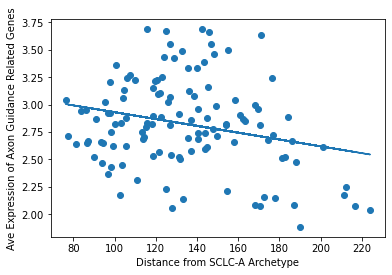

In [74]:
x = distances['SCLC-A']
y = axon_expression.mean(axis = 1)
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
from sklearn.metrics import r2_score
print("R^2: " + str(r2_score(y, m*x + b)))
print("R: " + str(np.corrcoef(x,y)))
plt.scatter(x,y)
plt.ylabel("Ave Expression of Axon Guidance Related Genes")
plt.xlabel("Distance from SCLC-A Archetype")

In the supplement of Yang et al., the authors had a list of cell lines that they investigated, some of which are not included in the paper. We'll look at just these cell lines, their distance from N, and the reported slithering from Yang et al.

In [117]:
ave_axon = pd.DataFrame(axon_expression.mean(axis = 1))
ave_axon = ave_axon.loc[['c.NCIH446','c.NCIH2081','c.NCIH1694','c.NCIH69','c.NCIH82','c.NCIH889','c.NCIH524']]
ave_axon['protrusions'] =['high','medium','low','no','no','low','no']
ave_axon['distance_N'] = distances.loc[ave_axon.index]['SCLC-N']

<AxesSubplot:xlabel='protrusions', ylabel='0'>

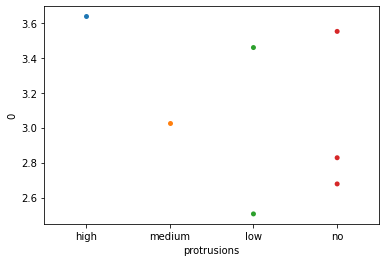

In [118]:
sns.swarmplot(data = ave_axon, x = 'protrusions', y =0)

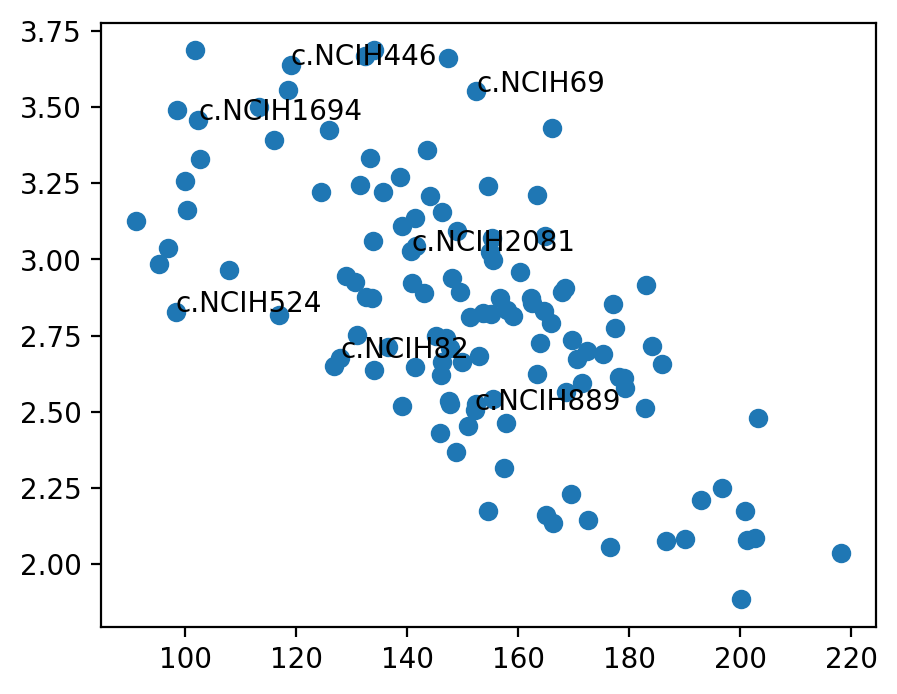

In [119]:
plt.figure(figsize = (5,4), dpi = 200)

plt.scatter(distances['SCLC-N'],axon_expression.mean(axis = 1))

for (x,y, label) in zip(distances['SCLC-N'],axon_expression.mean(axis = 1),clines.index):
    try:
        if label in ave_axon.index:
            plt.text(x,y,label)
    except IndexError: pass

In [120]:
ave_axon

,0,protrusions,distance_N
c.NCIH446,3.637795,high,119.028370
c.NCIH2081,3.028000,medium,140.690407
c.NCIH1694,3.458640,low,102.355264
c.NCIH69,3.551074,no,152.425468
c.NCIH82,2.677745,no,127.929577
c.NCIH889,2.506071,low,152.138876
c.NCIH524,2.827702,no,98.340963


Text(0.5, 0, 'Distance to SCLC-N Archetype')

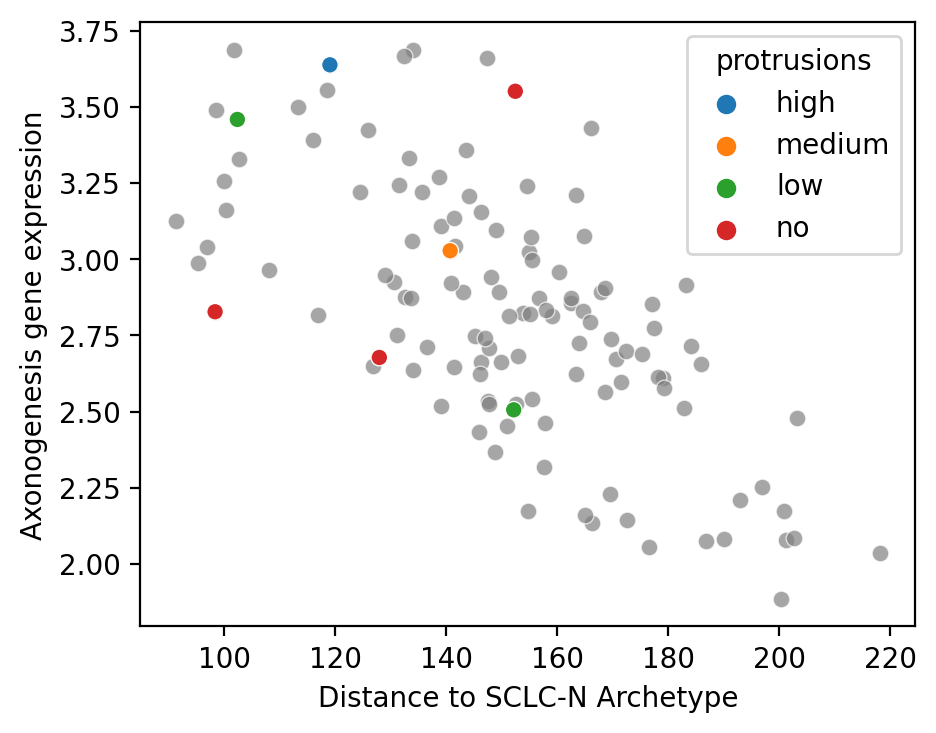

In [121]:
plt.figure(figsize = (5,4), dpi = 200)

ax = sns.scatterplot(x = distances['SCLC-N'],y = axon_expression.mean(axis = 1), color = 'gray', alpha = .7)

sns.scatterplot(data = ave_axon, x = 'distance_N',y = 0, hue = 'protrusions', legend=True, ax = ax)
plt.ylabel('Axonogenesis gene expression')
plt.xlabel('Distance to SCLC-N Archetype')

In [50]:
ave_axon.sort_values('distance_N', ascending=True)

,0,slithering,distance_N
c.NCIH524,2.827702,no,98.340963
c.NCIH1694,3.458640,low,102.355264
c.NCIH446,3.637795,high,119.028370
c.NCIH82,2.677745,no,127.929577
c.NCIH2081,3.028000,medium,140.690407
c.NCIH889,2.506071,low,152.138876
c.NCIH69,3.551074,no,152.425468


We want to know which cell lines are closest and farthest from N, and which cell lines are highest and lowest in expression.

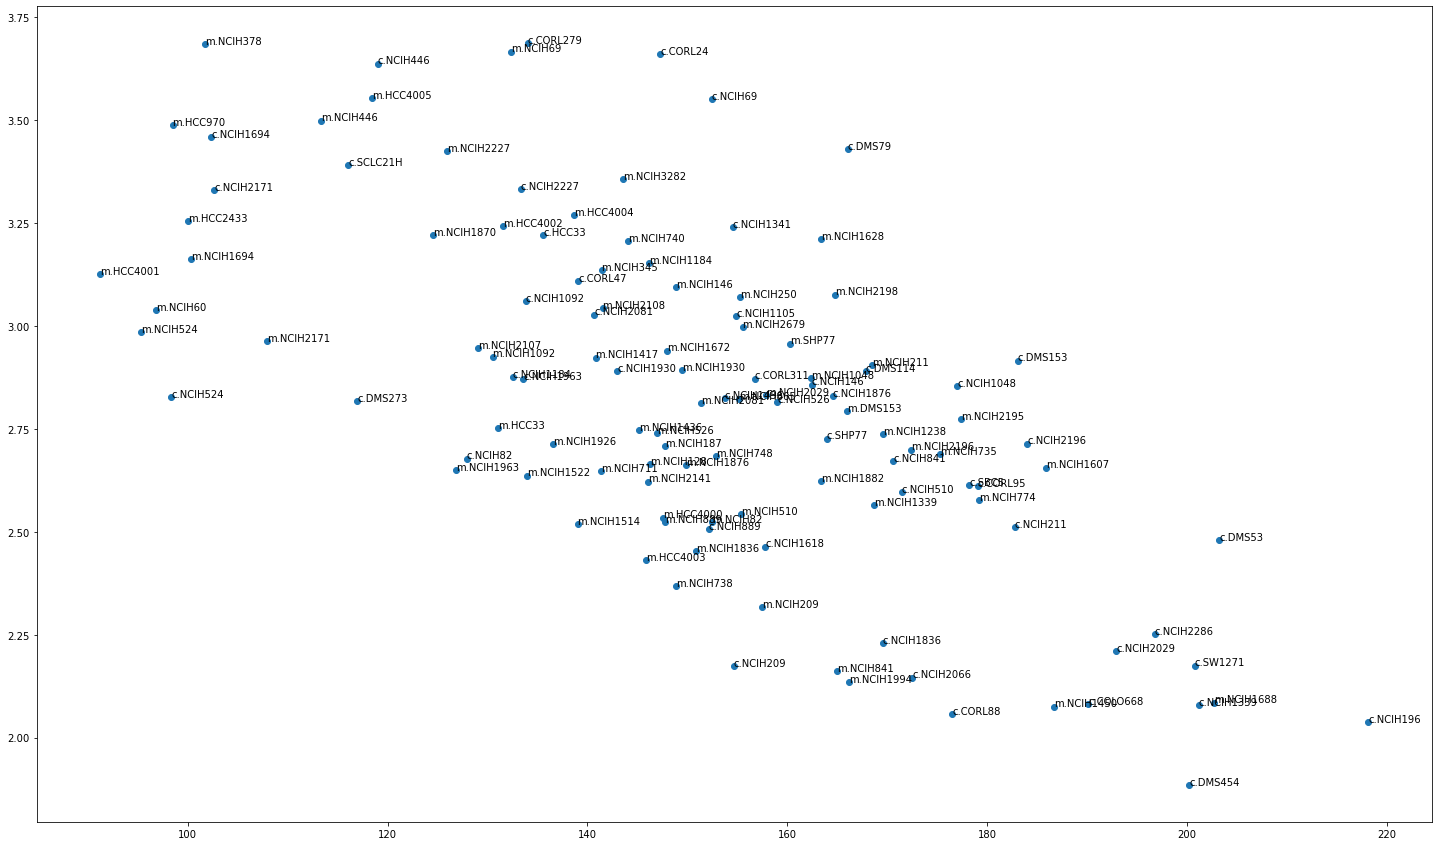

In [73]:
plt.figure(figsize = (25,15))

plt.scatter(distances['SCLC-N'],axon_expression.mean(axis = 1))

for (x,y, label) in zip(distances['SCLC-N'],axon_expression.mean(axis = 1),clines.index):
    plt.text(x,y,label)


- Closest to N with high axon genes: H378, HCC970, H1694, H446, H2171
- Farthest from N with low axon genes: DMS454, H196, SW1271, CORL88, H1359, H1450

Are any specific genes in the axonogenesis gene signature better at predicting protrusions than the average? This is a tricky question since we only have 7 samples, but we can get some estimates.

In [157]:
X = axon_expression.copy()
X = X.loc[ave_axon.index]
X

,SEMA4B,SEMA4F,ALCAM,SEMA4C,CXCR4,EFNA3,NRP2,NCAM1,SLIT3,TUBB3,...,ROBO4,UNC5A,ROBO3,MAPT,UNC5B,VLDLR,EFNA4,KIF2A,SEMA6B,FEZ1
c.NCIH446,1.783123,3.756994,4.176530,4.067928,3.965763,3.871799,5.530036,7.839062,-0.046999,6.030671,...,0.078872,4.884078,5.430767,6.470764,3.630021,4.923982,0.970121,5.621118,3.416023,1.240117
c.NCIH2081,3.511292,2.738679,7.637761,4.870659,4.496010,2.462196,1.271379,7.352527,-0.082750,7.722417,...,-0.009141,5.096840,1.186970,6.691553,2.821040,3.948138,0.086544,5.477484,3.521055,1.365706
c.NCIH1694,2.524384,3.064064,1.746277,4.999873,4.973336,3.302940,4.558653,5.379843,0.308505,7.176348,...,0.016006,4.975254,2.650434,6.959302,3.469732,3.306370,0.424798,5.875373,4.572655,6.140213
c.NCIH69,2.951911,-0.183709,6.883707,3.148576,6.748310,3.417586,4.265983,7.376425,0.040109,7.677837,...,-0.009303,4.883308,-0.237276,5.813911,4.174048,3.871578,1.497147,6.249631,-0.077174,7.065839
c.NCIH82,3.207349,2.480936,2.278083,2.854913,2.748952,1.978440,4.539503,5.580409,0.413087,6.023331,...,0.024030,2.121419,0.643972,2.646339,5.712035,1.941850,1.036056,5.170643,0.218520,4.840298
c.NCIH889,2.072271,2.967229,6.534136,3.081112,4.807510,2.484406,2.636694,7.489393,-0.015645,8.098820,...,-0.004884,3.698546,1.038314,6.437385,3.451780,4.183422,0.719506,5.495104,1.570221,0.420628
c.NCIH524,2.400743,2.306358,4.524562,2.728331,6.162221,2.157983,5.364914,6.555594,0.148754,6.819224,...,0.093161,4.233506,3.237634,5.485580,0.935627,2.298639,0.298479,5.409728,4.333564,1.492545


In [158]:
X['target'] = [{'high':True, 'medium':True, 'low':False, 'no':False}[i] for i in ave_axon.protrusions]

In [159]:
y= X.pop('target')

In [160]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()         # Create a logistic regression model
logreg.fit(X, y)      

LogisticRegression()

Text(0.5, 1.0, 'Logistic Regression Coefficients')

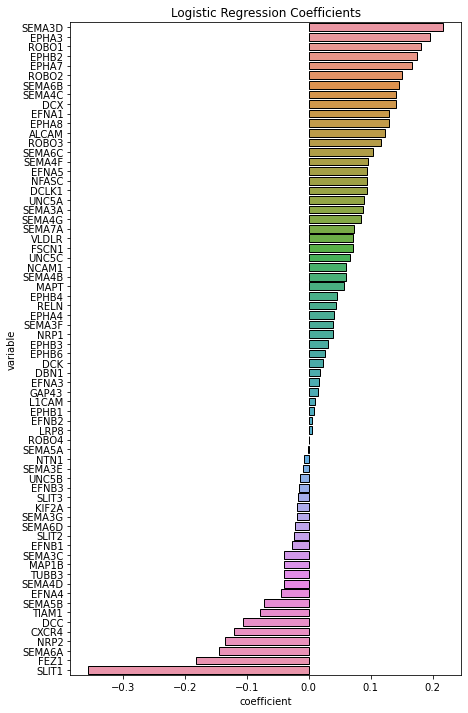

In [161]:
importances = pd.DataFrame({'variable': X.columns,
                           'coefficient': logreg.coef_[0]}).sort_values('coefficient', ascending = False)


fig, ax = plt.subplots(figsize = (7,12))
sns.barplot(data = importances,
            x = 'coefficient', y = 'variable', ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')


In [169]:
Xy = X.copy()
Xy['target'] = ave_axon.protrusions

In [174]:
Xy['distance_N'] = ave_axon['distance_N']
Xy

,SEMA4B,SEMA4F,ALCAM,SEMA4C,CXCR4,EFNA3,NRP2,NCAM1,SLIT3,TUBB3,...,ROBO3,MAPT,UNC5B,VLDLR,EFNA4,KIF2A,SEMA6B,FEZ1,target,distance_N
c.NCIH446,1.783123,3.756994,4.176530,4.067928,3.965763,3.871799,5.530036,7.839062,-0.046999,6.030671,...,5.430767,6.470764,3.630021,4.923982,0.970121,5.621118,3.416023,1.240117,high,119.028370
c.NCIH2081,3.511292,2.738679,7.637761,4.870659,4.496010,2.462196,1.271379,7.352527,-0.082750,7.722417,...,1.186970,6.691553,2.821040,3.948138,0.086544,5.477484,3.521055,1.365706,medium,140.690407
c.NCIH1694,2.524384,3.064064,1.746277,4.999873,4.973336,3.302940,4.558653,5.379843,0.308505,7.176348,...,2.650434,6.959302,3.469732,3.306370,0.424798,5.875373,4.572655,6.140213,low,102.355264
c.NCIH69,2.951911,-0.183709,6.883707,3.148576,6.748310,3.417586,4.265983,7.376425,0.040109,7.677837,...,-0.237276,5.813911,4.174048,3.871578,1.497147,6.249631,-0.077174,7.065839,no,152.425468
c.NCIH82,3.207349,2.480936,2.278083,2.854913,2.748952,1.978440,4.539503,5.580409,0.413087,6.023331,...,0.643972,2.646339,5.712035,1.941850,1.036056,5.170643,0.218520,4.840298,no,127.929577
c.NCIH889,2.072271,2.967229,6.534136,3.081112,4.807510,2.484406,2.636694,7.489393,-0.015645,8.098820,...,1.038314,6.437385,3.451780,4.183422,0.719506,5.495104,1.570221,0.420628,low,152.138876
c.NCIH524,2.400743,2.306358,4.524562,2.728331,6.162221,2.157983,5.364914,6.555594,0.148754,6.819224,...,3.237634,5.485580,0.935627,2.298639,0.298479,5.409728,4.333564,1.492545,no,98.340963


<AxesSubplot:xlabel='SEMA3D', ylabel='target'>

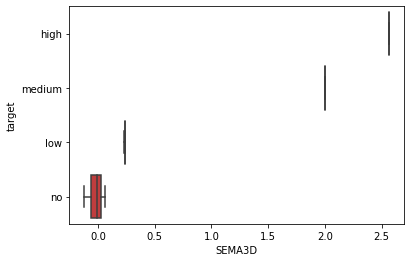

In [175]:
sns.boxplot(data = Xy, x ='SEMA3D', y = 'target')

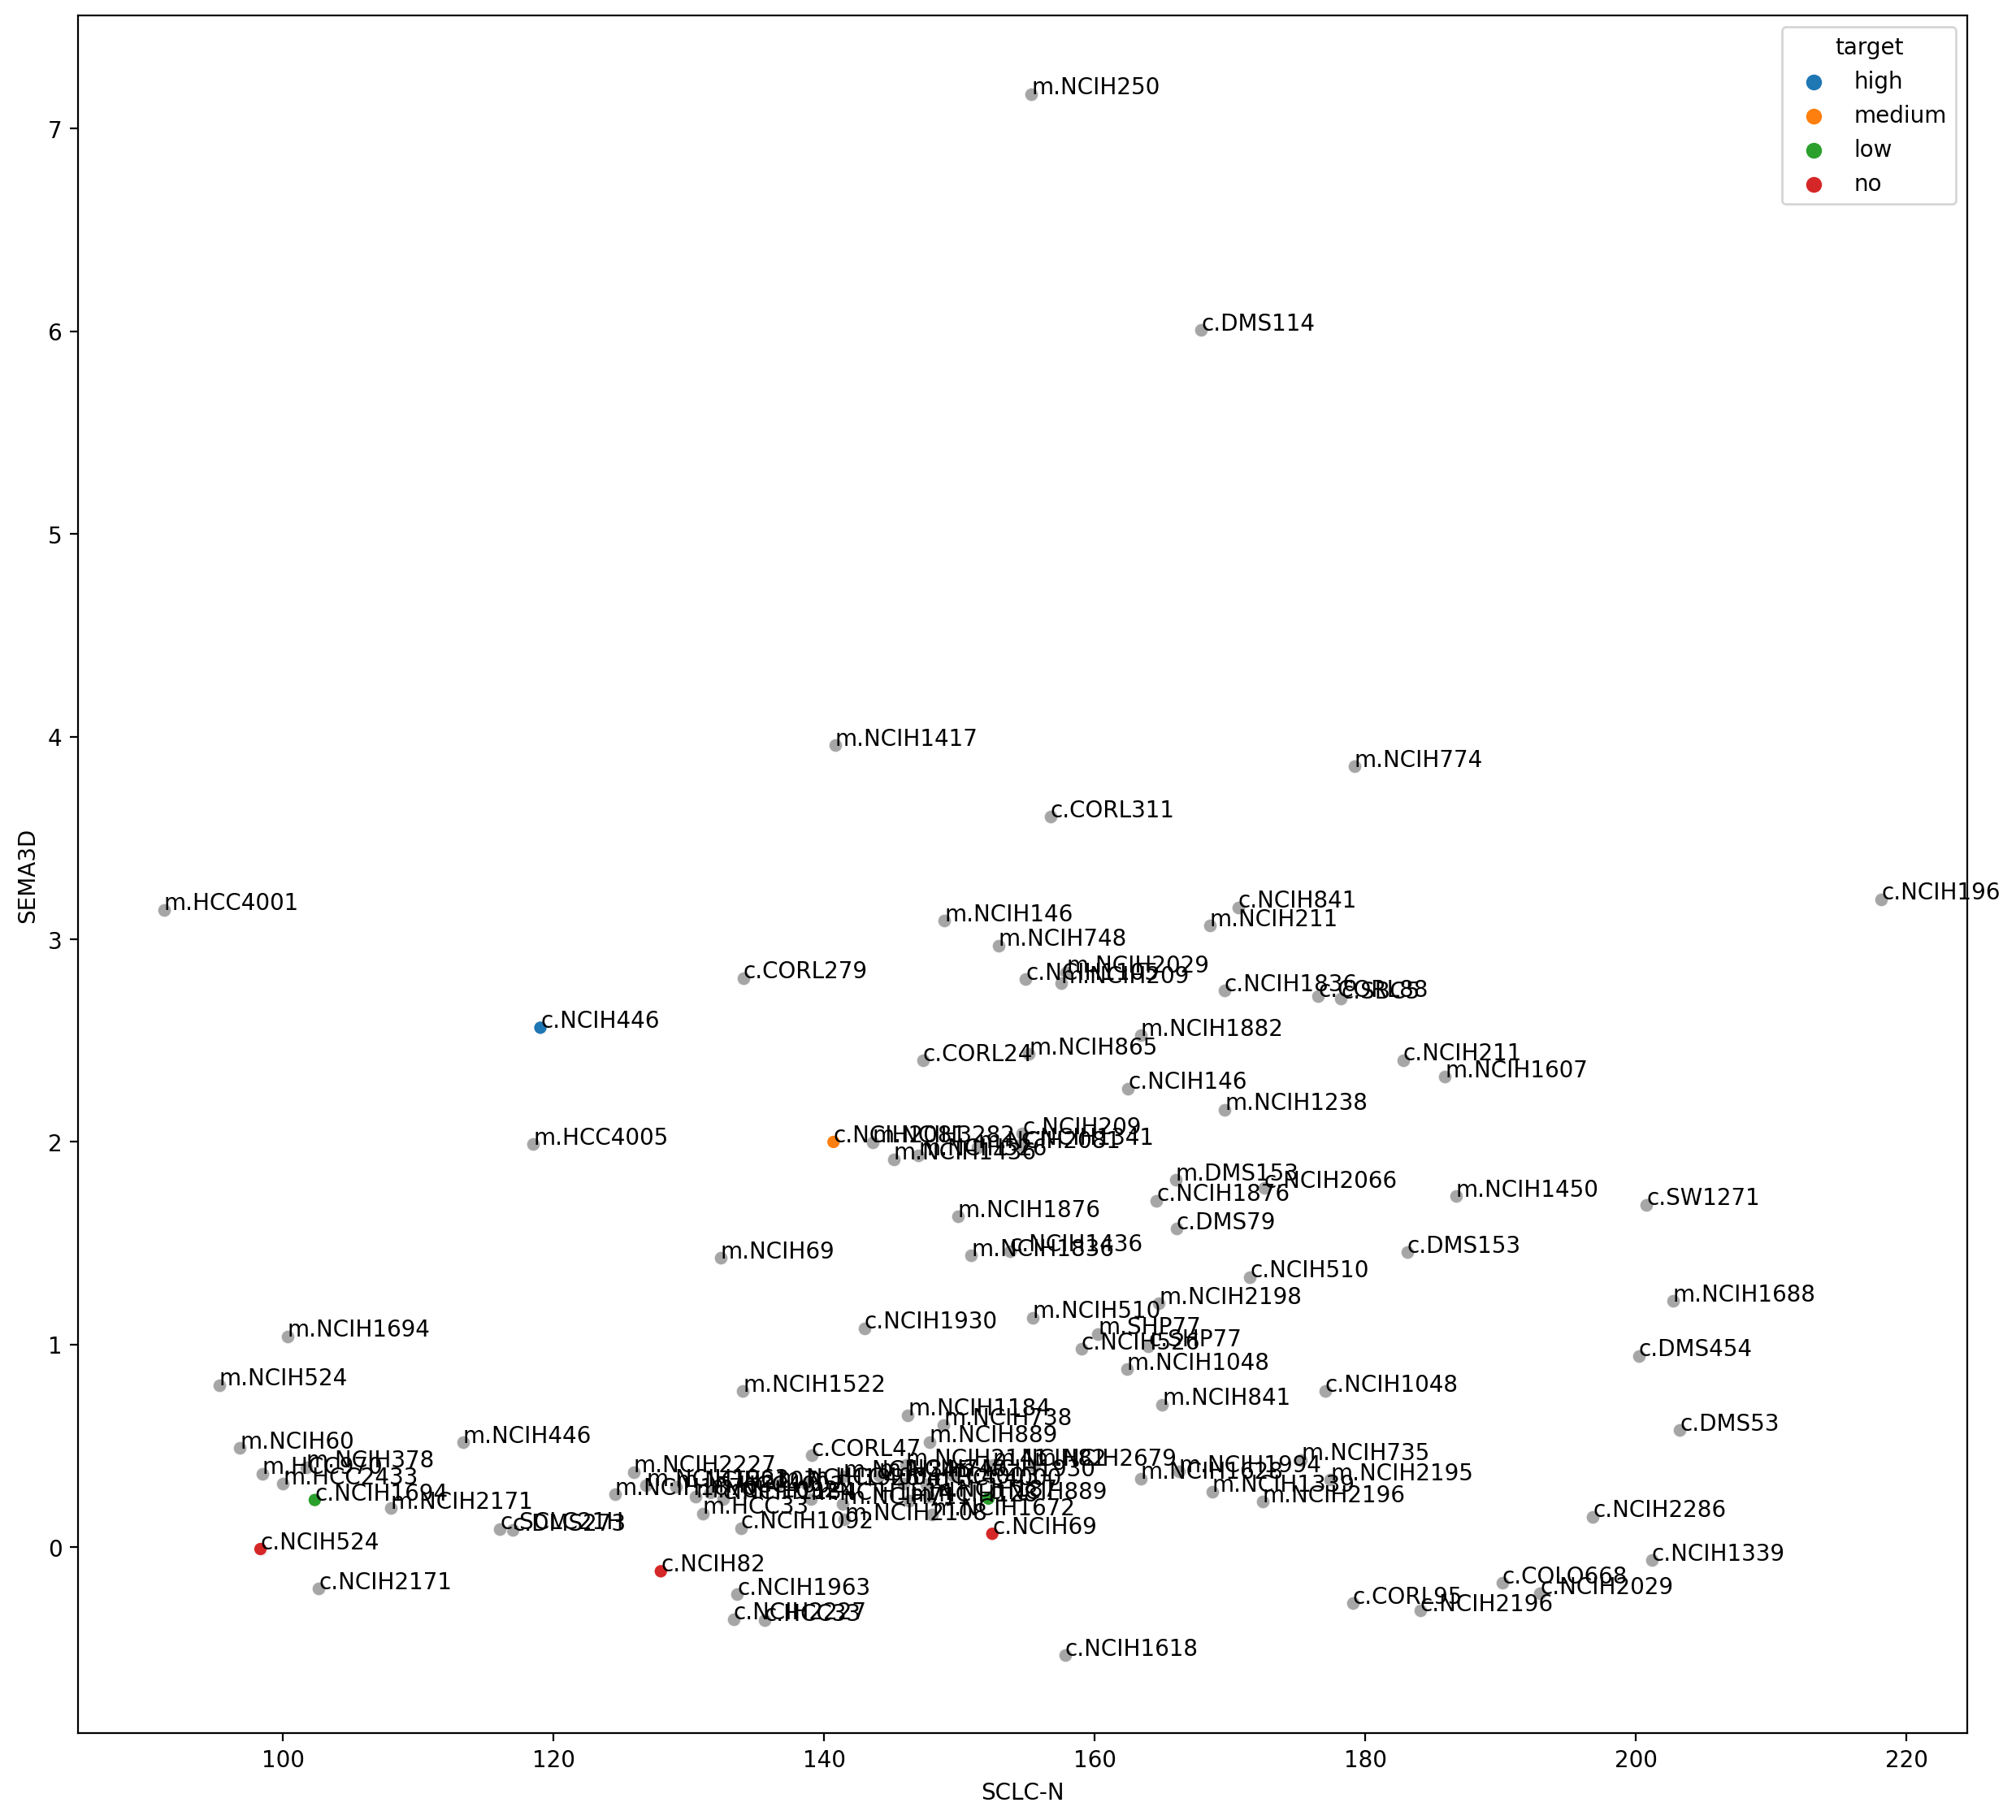

In [197]:
gene = 'SEMA3D'
plt.figure(figsize = (15,14), dpi = 200)

ax = sns.scatterplot(x = distances['SCLC-N'],y = axon_expression[gene], color = 'gray', alpha = .7)

sns.scatterplot(data = Xy, x = 'distance_N',y = gene, hue = 'target', legend=True, ax = ax)
for (x,y, label) in zip(distances['SCLC-N'],axon_expression[gene],clines.index):
    plt.text(x,y,label)

While SEMA3D expression is most predictive of protrusions in the 7 samples we have, it is not correlated with distance to N archetype. Interestingly, CXCR4 is analyzed in Yang et al. and affects protrusions, but is inversely related to the protrusions in these cell lines.

Lastly, Yang et al. actually subsetted the 69 gene list to 13 that they thought were most key.

In [198]:
key_axon_genes = ['CXCR4',
'DBN1',
'DCC',
'DCLK1',
'DCX',
'FEZ1',
'FSCN1',
'GAP43',
'LRP8',
'MAP1B',
'RELN',
'TIAM1',
'VLDLR']

R^2: 0.5097407029191461
R: [[ 1.         -0.71396128]
 [-0.71396128  1.        ]]


Text(0.5, 0, 'Distance from SCLC-N Archetype')

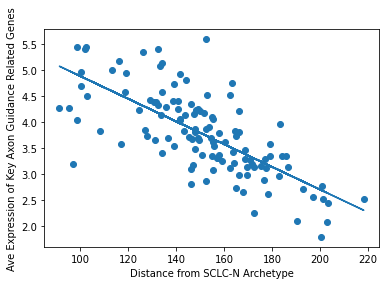

In [217]:
x = distances['SCLC-N']
y = axon_expression[key_axon_genes].mean(axis = 1)
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
from sklearn.metrics import r2_score
print("R^2: " + str(r2_score(y, m*x + b)))
print("R: " + str(np.corrcoef(x,y)))
plt.scatter(distances['SCLC-N'],axon_expression[key_axon_genes].mean(axis = 1))
plt.ylabel("Ave Expression of Key Axon Guidance Related Genes")
plt.xlabel("Distance from SCLC-N Archetype")

In [201]:
X_small = X.copy()[key_axon_genes]

In [212]:
y = [{'high':True, 'medium':True, 'low':False, 'no':False}[i] for i in ave_axon.protrusions]

In [214]:
X_small

,CXCR4,DBN1,DCC,DCLK1,DCX,FEZ1,FSCN1,GAP43,LRP8,MAP1B,RELN,TIAM1,VLDLR
c.NCIH446,3.965763,6.831809,4.158095,3.334332,3.745647,1.240117,7.082134,7.081159,6.003516,6.719658,4.346503,4.656508,4.923982
c.NCIH2081,4.496010,6.722247,0.305073,5.235221,6.122293,1.365706,5.828115,2.670476,3.660761,7.050857,3.973662,3.703997,3.948138
c.NCIH1694,4.973336,7.383939,3.040678,2.948099,4.507583,6.140213,7.139725,6.702160,5.907591,6.913190,6.507159,5.202901,3.306370
c.NCIH69,6.748310,6.570945,5.015621,4.274917,6.339340,7.065839,6.404229,2.553822,4.097171,9.092945,5.269969,5.304969,3.871578
c.NCIH82,2.748952,6.778612,3.765376,-0.053931,0.500953,4.840298,6.772962,6.905245,4.349158,6.340054,0.315371,3.240789,1.941850
c.NCIH889,4.807510,6.233640,0.659494,4.965994,2.602707,0.420628,4.573539,3.237132,3.960219,6.339468,3.487169,4.779521,4.183422
c.NCIH524,6.162221,6.780336,2.980028,1.731619,4.978079,1.492545,5.330693,4.259146,4.188879,7.907551,0.502317,3.775328,2.298639


In [215]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()         # Create a logistic regression model
logreg.fit(X_small, y)      

LogisticRegression()

Text(0.5, 1.0, 'Logistic Regression Coefficients')

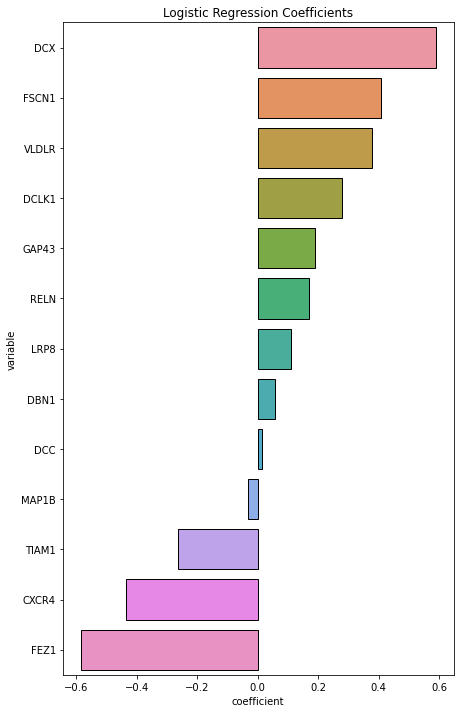

In [216]:
importances = pd.DataFrame({'variable': X_small.columns,
                           'coefficient': logreg.coef_[0]}).sort_values('coefficient', ascending = False)


fig, ax = plt.subplots(figsize = (7,12))
sns.barplot(data = importances,
            x = 'coefficient', y = 'variable', ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')


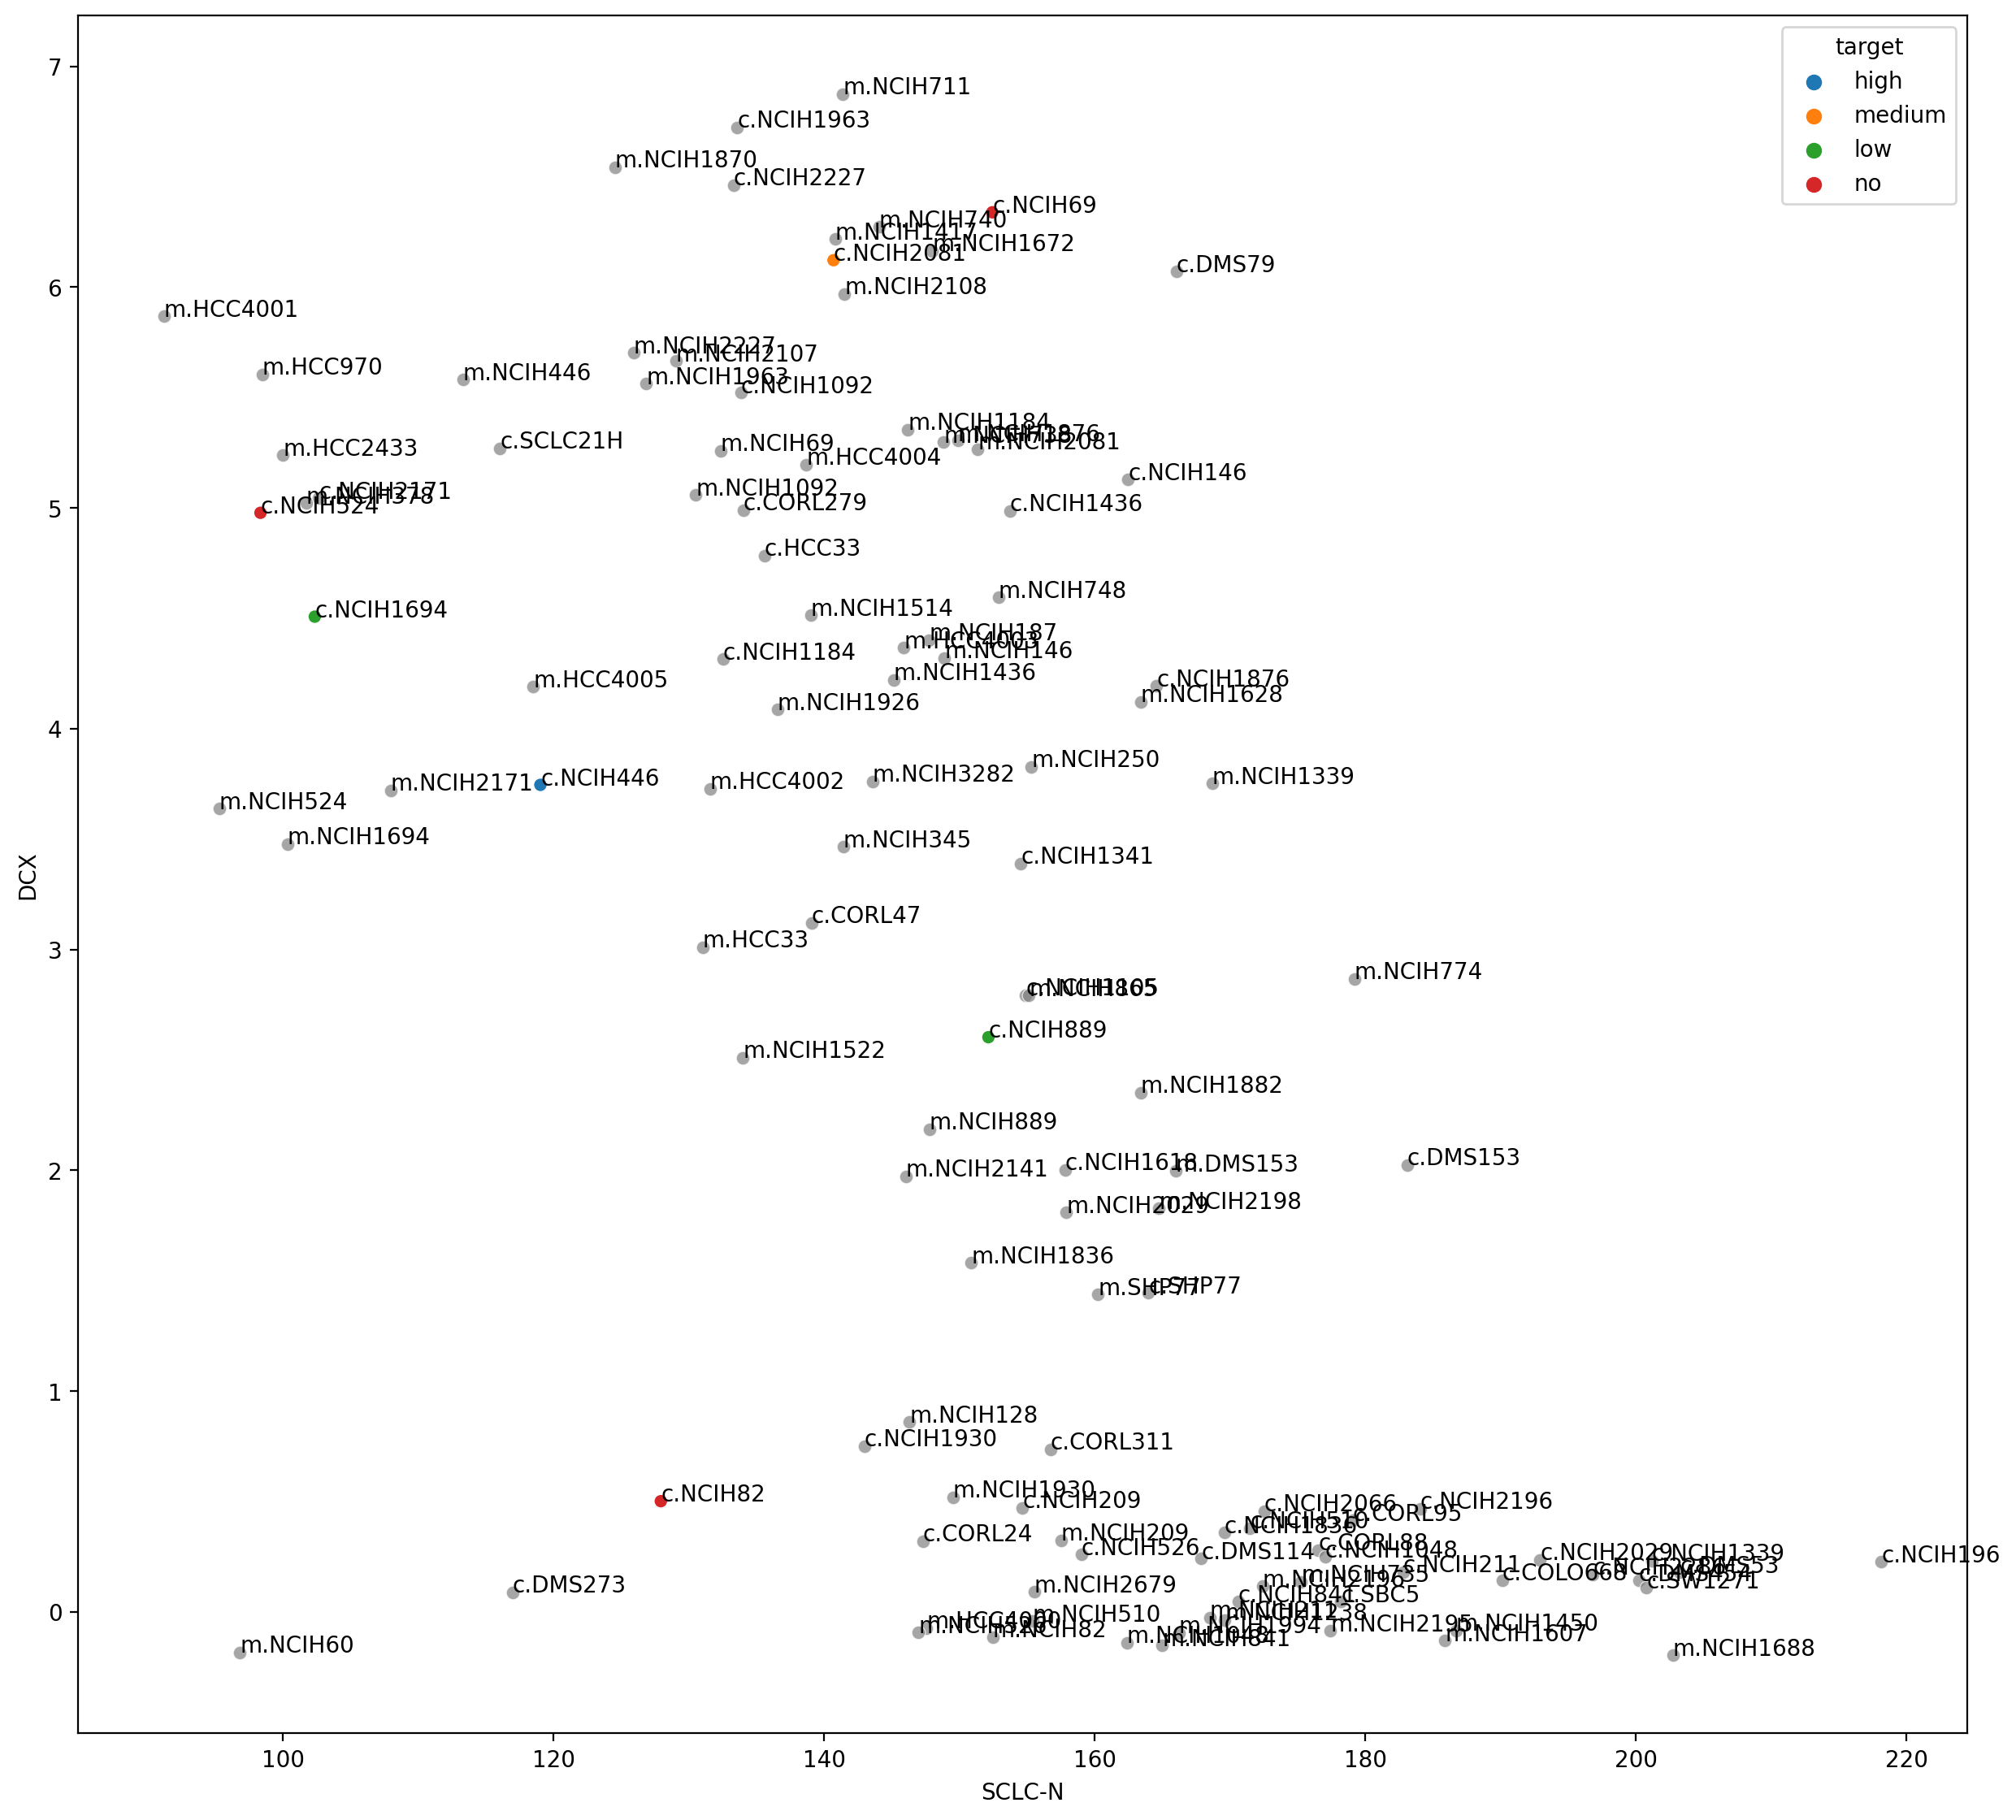

In [209]:
gene = 'DCX'
plt.figure(figsize = (15,14), dpi = 200)

ax = sns.scatterplot(x = distances['SCLC-N'],y = axon_expression[gene], color = 'gray', alpha = .7)

sns.scatterplot(data = Xy, x = 'distance_N',y = gene, hue = 'target', legend=True, ax = ax)
for (x,y, label) in zip(distances['SCLC-N'],axon_expression[gene],clines.index):
    plt.text(x,y,label)

## Migration genes

In [90]:
data_pivot = data.copy()
data_pivot['cline'] = data.index
data_pivot['cluster'] = clines['10_08_2020']
data_pivot = data_pivot.melt(id_vars=['cline','cluster'], value_vars=['ZEB1','SMAD2','CD44'])
data_pivot = data_pivot.sort_values(['cluster'])


<AxesSubplot:xlabel='variable', ylabel='value'>

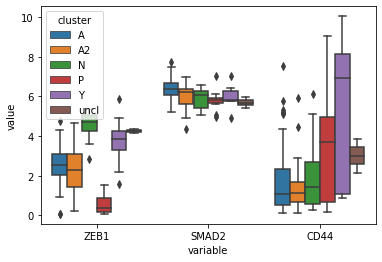

In [91]:
sns.boxplot(data=data_pivot, y='value', hue='cluster', x = 'variable', order = ['ZEB1','SMAD2','CD44'])

In [92]:
def barplot_arc_genes(genes, fname):
    arc_pivot = arc.T.copy()
    arc_pivot['arc'] = arc.columns
    arc_pivot = arc_pivot.melt(id_vars = 'arc', value_vars=genes)
    arc_pivot = arc_pivot.sort_values('arc')
    plt.figure(figsize=(5,4))
    sns.barplot(data=arc_pivot, y='value',hue = 'arc', x = 'variable', order = genes)
    plt.savefig(f'./out/{fname}_genes.pdf')

In [93]:
arc.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2',"SCLC-A"]

arc = arc.sort_index(axis = 1)

In [94]:
t_df = arc.loc[['CDH1','VIM','TWIST1','ZEB1','SNAI1']]

t_df

,SCLC-A,SCLC-A2,SCLC-N,SCLC-P,SCLC-Y
CDH1,4.591236,6.669417,0.378813,5.396650,0.738727
VIM,1.829926,1.448534,3.712030,3.842298,11.021428
TWIST1,1.532070,1.016004,2.580754,2.450312,3.413518
ZEB1,2.817480,1.693763,4.489894,0.043384,4.574809
SNAI1,1.389156,2.296239,2.104847,2.469761,1.691212


In [95]:
t = (t_df.T-t_df.min(axis = 1))

In [96]:
t/t.max()

,CDH1,VIM,TWIST1,ZEB1,SNAI1
SCLC-A,0.669637,0.039841,0.215250,0.612191,0.000000
SCLC-A2,1.000000,0.000000,0.000000,0.364208,0.839422
SCLC-N,0.000000,0.236449,0.652655,0.981261,0.662306
SCLC-P,0.797672,0.250057,0.598248,0.000000,1.000000
SCLC-Y,0.057215,1.000000,1.000000,1.000000,0.279525


<AxesSubplot:>

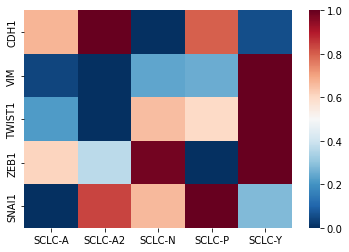

In [97]:
plt.figure()
sns.heatmap((t/t.max()).T, cmap = 'RdBu_r')
# plt.savefig('./out/EMT_N.pdf')

In [98]:
((arc.loc[['CDH1','VIM','TWIST1','ZEB1','SNAI1']]).T/(arc.loc[['CDH1','VIM','TWIST1','ZEB1','SNAI1']]).T.max()).T

,SCLC-A,SCLC-A2,SCLC-N,SCLC-P,SCLC-Y
CDH1,0.688401,1.000000,0.056798,0.809164,0.110763
VIM,0.166033,0.131429,0.336801,0.348621,1.000000
TWIST1,0.448824,0.297641,0.756039,0.717826,1.000000
ZEB1,0.615868,0.370237,0.981439,0.009483,1.000000
SNAI1,0.562466,0.929742,0.852247,1.000000,0.684768


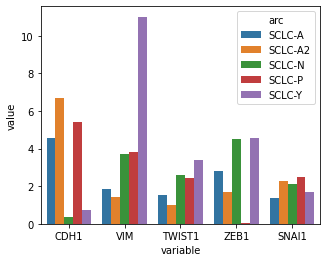

In [99]:
barplot_arc_genes(['CDH1','VIM','TWIST1','ZEB1','SNAI1'], fname = 'N')

In [100]:
# CGRP Elisa data
# cgrp_elisa = {'DMS153': 124700,
# 'DMS53': 35.01,
# 'H1930': 2939,
# 'H69': 22.9,
# 'H446': 55,
# 'H841': 12.3,
# 'H524': 75,
# 'H82': 0}
# cgrp_elisa = pd.DataFrame(cgrp_elisa, index = ['cgrp']).T

In [101]:
# cgrp_elisa

In [102]:
# dist = []
# for i,r in cgrp_elisa.iterrows():
#     dist.append(np.average(distances.loc[[j for j in distances.index if i in j]]['SCLC-A2'].values))

In [103]:
# cgrp_elisa['dist'] = dist

In [104]:
# cgrp_elisa['log_cgrp'] = np.log1p(cgrp_elisa['cgrp'])

In [105]:
# sns.lmplot(data = cgrp_elisa, y = 'log_cgrp', x = 'dist')
# plt.xlabel('Distance from SCLC-A2 Archetype')
# plt.ylabel('Log1p(CGRP level) \n [pg/10^6 cells]')

# Bulk SCLC Cell Lines vs. TPC signatures

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


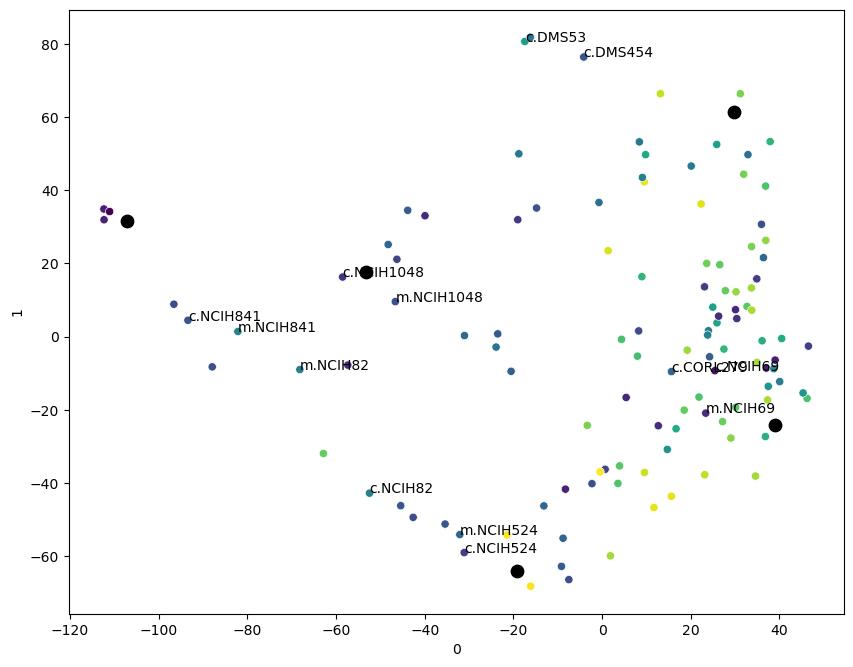

In [233]:
pcs_to_plot = [0,1]
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], c = data['MYCL'])
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)
for (x,y, label) in zip(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]],clines.index):
    try:
        if label.split('.')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
        elif label.split('.NCI')[1] in adata.obs['cline'].cat.categories:
            plt.text(x,y,label)
    except IndexError: pass


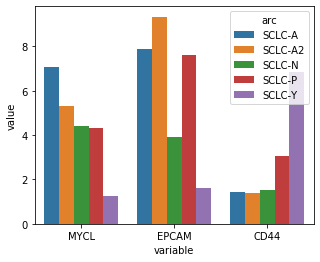

In [105]:
barplot_arc_genes(['MYCL','EPCAM','CD44'], fname = 'A2')

# Plotting various other gene sets

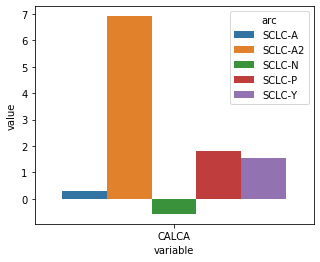

In [106]:
barplot_arc_genes(['CALCA'], fname = 'A2')

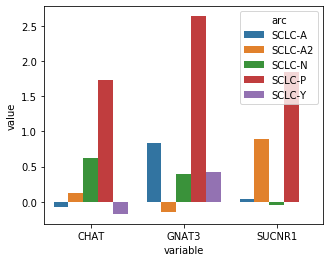

In [107]:
barplot_arc_genes(['CHAT', 'GNAT3', 'SUCNR1'], fname = 'P')

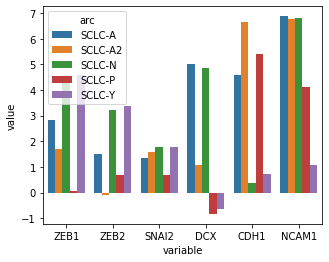

In [32]:
barplot_arc_genes(['ZEB1','ZEB2','SNAI2','DCX', 'CDH1','NCAM1'], fname = 'N')

# Transit Amplifying signature

In [80]:
ta = pd.read_csv(op.join(indir,'NE_stem_TA_markers.csv'), index_col=0)

In [81]:
ta_genes = ta.loc[ta['TA']==1].index.values
ta_genes = [i.upper() for i in ta_genes]

In [82]:
arc.loc[set(ta_genes).intersection(arc.index)].mean()

0    3.571826
1    2.324767
2    1.982983
3    1.966742
4    1.816900
dtype: float64

In [83]:
ta_df = pd.DataFrame(data.T.loc[set(ta_genes).intersection(data.columns)].mean(), columns = ['ta'])

In [84]:
ta_df = ta_df.sort_index()

In [85]:
ta_df['cluster'] = clines['10_08_2020']

In [86]:
ta_df

,ta,cluster
c.COLO668,2.529524,A2
c.CORL24,2.601656,A
c.CORL279,2.061378,A
c.CORL311,1.677099,P
c.CORL47,1.413887,A
...,...,...
m.NCIH82,3.372423,uncl
m.NCIH841,2.590135,Y
m.NCIH865,1.692720,A2
m.NCIH889,1.563354,A


<AxesSubplot:xlabel='cluster', ylabel='ta'>

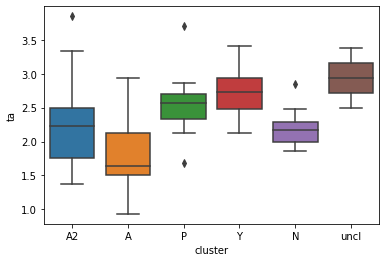

In [87]:
sns.boxplot(data = ta_df, y='ta', x = 'cluster')

R^2: 0.471642185214978
R: [[ 1.        -0.6867621]
 [-0.6867621  1.       ]]


Text(0.5, 0, 'Distance from SCLC-Y Archetype')

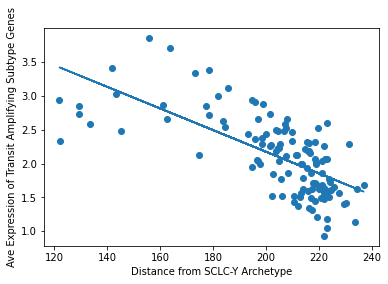

In [88]:
x = distances['SCLC-Y'].sort_index()
y = data[set(ta_genes).intersection(data.columns)].mean(axis = 1).sort_index()
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
from sklearn.metrics import r2_score
print("R^2: " + str(r2_score(y, m*x + b)))
print("R: " + str(np.corrcoef(x,y)))
plt.scatter(x,y)
plt.ylabel("Ave Expression of Transit Amplifying Subtype Genes")
plt.xlabel("Distance from SCLC-Y Archetype")
# plt.savefig('./out/TA_Y_scatterplot.pdf')

/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


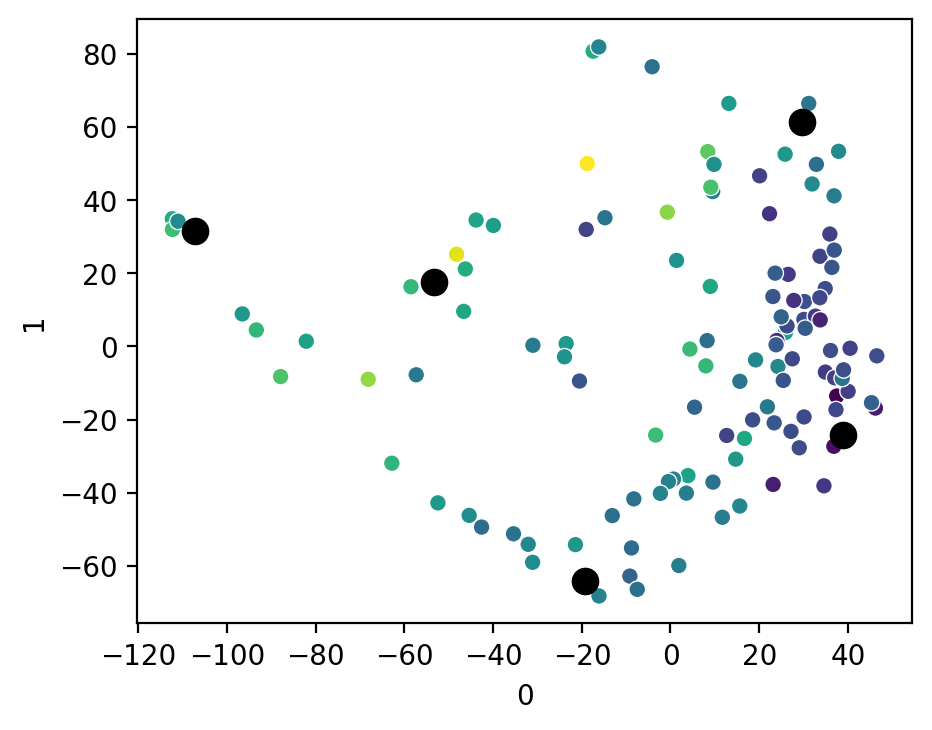

In [93]:
pcs_to_plot = [0,1]
plt.figure(figsize = (5,4), dpi = 200)
sns.scatterplot(pcs[pcs_to_plot[0]],pcs[pcs_to_plot[1]], c = data[set(ta_genes).intersection(data.columns)].sort_index().mean(axis = 1))
plt.scatter(arc_pc.iloc[pcs_to_plot[0]],arc_pc.iloc[pcs_to_plot[1]], color = 'black', s = 80)

# Plot ANPY Expression

In [75]:
tfs = data[['ASCL1','NEUROD1','POU2F3','YAP1']]

In [76]:
cl = ['DMS53','DMS454','CORL279','H69','H82','H524','H1048','H841']

In [77]:
cl_ind = []
for c in cl:
    [cl_ind.append(i) for i in tfs.index if c in i]

In [78]:
cl_ind

['c.DMS53',
 'c.DMS454',
 'c.CORL279',
 'm.NCIH69',
 'c.NCIH69',
 'm.NCIH82',
 'c.NCIH82',
 'm.NCIH524',
 'c.NCIH524',
 'm.NCIH1048',
 'c.NCIH1048',
 'm.NCIH841',
 'c.NCIH841']

<AxesSubplot:>

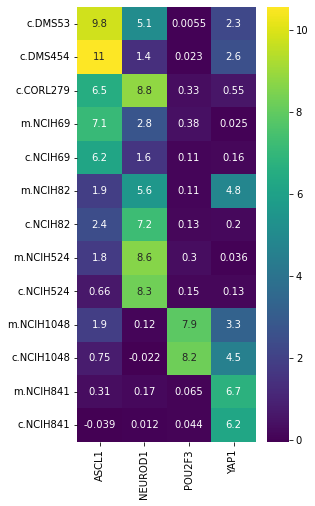

In [79]:
plt.figure(figsize = (4,8))
sns.heatmap(tfs.loc[cl_ind], annot=True, cmap = 'viridis')
# plt.savefig('../figures/clines/hm_tf_expression_bulk.pdf')